Chúng ta sẽ học thêm về phân cấp hierarchies:

- B1: Liên kết các samples với nhau, duyệt qua các mẫu nếu chúng gần nhau gộp thành 1 cụm.scipy.cluster.hierarchy.linkage giúp chúng ta làm việc này.
    - với method ='complete', khoảng cách giữa 2 cụm sẽ là khoảng cách của 2 điểm xa nhất.
    - với method ='single', khoảng cách giữa 2 cụm sẽ là khoảng cách của 2 điểm gần nhất.
- B2: Ta trực quan hóa việc gom các samples với nhau, việc gom này cứ làm liên tục cho đến khi gộp thành 1, các mẫu cứ gộp với nhau giống như phân cấp cho tới khi tới cấp tổng thể. scipy.cluster.hierarchy.dendrogram giúp chúng ta thấy tổng thể, các các mẫu gộp với nhau, cũng như khoảng cách các cụm được gom với nhau. 
- B3: Sau khi ta thấy tổng thể các cụm cũng như khoảng cách, ta chọn 1 điểm khoảng cách để chia các mẫu thành các cụm. Sử dụng: scipy.cluster.hierarchy.fcluster

Tham khảo: [Plot Hierarchical Clustering Dendrogram](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html)

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('ESC2017_GF.csv', delimiter=';').drop('Rank', axis =1)
X = data.drop('Countries', axis =1)
label = data['Countries'].values
data.head()

,Countries,Total,Albania,Austria,Belarus,Belgium,Croatia,Cyprus,Denmark,Estonia,...,Hungary,Moldova,Armenia,Czech Republic,Georgia,Montenegro,Azerbaijan,San Marino,Italy,Australia
0,Portugal,758,14,20,17,20,17,15,15,18,...,19,13,22,20,20,8,16,19,10,14
1,Bulgaria,615,20,17,24,18,18,17,14,19,...,22,18,7,14,13,8,14,14,10,13
2,Moldova,374,0,3,10,7,4,6,11,4,...,10,0,14,8,0,3,20,8,20,22
3,Belgium,363,5,10,6,0,5,5,8,14,...,8,2,5,4,0,10,4,13,9,4
4,Sweden,344,2,5,11,14,6,11,24,6,...,4,11,9,7,9,7,3,2,10,12


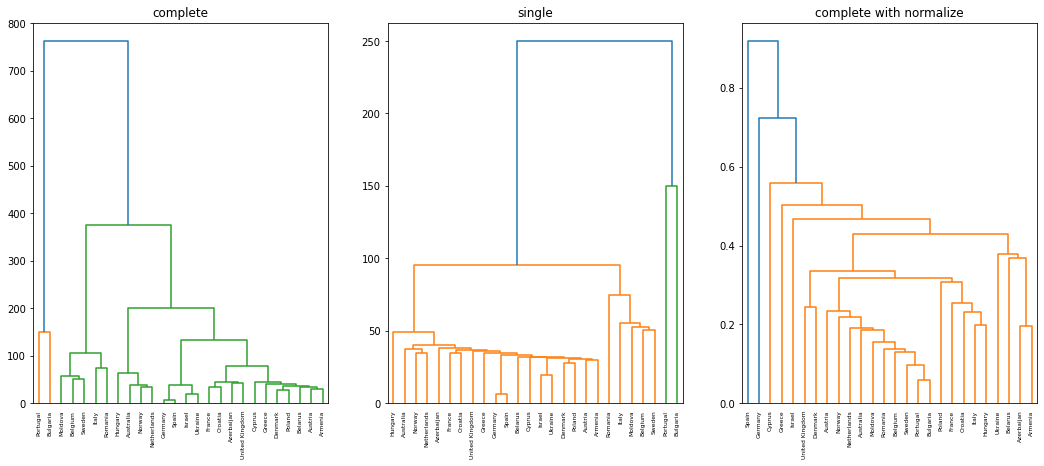

In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

plt.rcParams['figure.figsize'] = (18.0, 7.0)
plt.subplot(1, 3, 1)
mergings = linkage(X, method='complete')
dendrogram(mergings, labels= label,leaf_rotation=90, leaf_font_size=6)
plt.title('complete')

plt.subplot(1, 3, 2)
mergings = linkage(X, method='single')
dendrogram(mergings, labels= label,leaf_rotation=90, leaf_font_size=6)
plt.title('single')

plt.subplot(1, 3, 3)
dendrogram(linkage(normalize(X), method='complete'), labels= label,leaf_rotation=90, leaf_font_size=6)
plt.title('complete with normalize')

plt.show()

Với khoăng cách 300, method= 'complete' ta thấy các mẫu sẽ được gom thành 3 cụm, ta xem chúng được gom ra sao

In [3]:
from scipy.cluster.hierarchy import fcluster

labels_300 = fcluster(linkage( X , method='complete'), 300, criterion='distance')
df = pd.DataFrame({'labels': labels_300, 'countries': label})
ct = pd.crosstab(df['countries'], df['labels'])


print(ct)

labels          1  2  3
countries              
Armenia         0  0  1
Australia       0  0  1
Austria         0  0  1
Azerbaijan      0  0  1
Belarus         0  0  1
Belgium         0  1  0
Bulgaria        1  0  0
Croatia         0  0  1
Cyprus          0  0  1
Denmark         0  0  1
France          0  0  1
Germany         0  0  1
Greece          0  0  1
Hungary         0  0  1
Israel          0  0  1
Italy           0  1  0
Moldova         0  1  0
Netherlands     0  0  1
Norway          0  0  1
Poland          0  0  1
Portugal        1  0  0
Romania         0  1  0
Spain           0  0  1
Sweden          0  1  0
Ukraine         0  0  1
United Kingdom  0  0  1


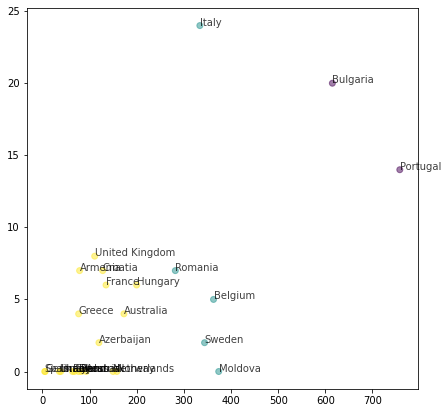

In [10]:
plt.rcParams['figure.figsize'] = (7.0, 7.0)

plt.scatter(X.values[:,0],X.values[:,1], c = labels_300, alpha=0.5 )

for x, y, company in zip(X.values[:,0],X.values[:,1], label):
    plt.annotate(company, (x, y), fontsize=10, alpha=0.75)

plt.show()

TSNE
- T-SNE chuyển mối liên hệ giữa các mẫu thành xác suất, nó không bảo tồn khoảng cách giữa các điểm

<img src = 'https://i.imgur.com/yJw1KU3.jpg'>

Tham khảo: https://lvdmaaten.github.io/publications/papers/JMLR_2014.pdf

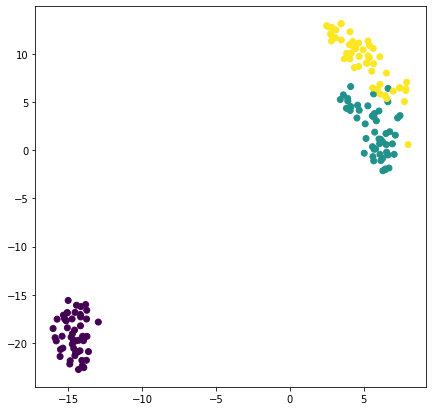

In [49]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris

plt.rcParams['figure.figsize'] = (7.0, 7.0)

data = load_iris(as_frame=True)
X = data.data.values

model = TSNE(learning_rate=80)
tsne_features = model.fit_transform(X)

xs = tsne_features[:,0]
ys = tsne_features[:,1]

plt.scatter(xs, ys, c = load_iris().target)
plt.show()

T-SNE giúp chúng ta khám phá dữ liệu, nhưng nói chúng với dữ liệu iris, khó có thể nói chọn 2 hay 3 cụm từ sự trực quan.